In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
tf.__version__

'2.9.2'

In [2]:
df = pd.read_csv("chevron_data_v2.csv")
print(df.columns.values.tolist())
df['State'] = df['State'].map({'Alabama': 's1', 'Alaska': 's2', 'Arizona': 's3', 'Arkansas': 's4', 'California': 's5',
                               'Colorado': 's6', 'Connecticut': 's7', 'Delaware': 's8', 'Florida': 's9', 'Georgia': 's10',
                               'Hawaii': 's11', 'Idaho': 's12', 'Illinois': 's13', 'Indiana': 's14', 'Iowa': 's15',
                               'Kansas': 's16', 'Kentucky': 's17', 'Louisiana': 's18', 'Maine': 's19', 'Maryland': 's20',
                               'Massachusetts': 's21', 'Michigan': 's22', 'Minnesota': 's23', 'Mississippi': 's24', 'Missouri': 's25',
                               'Montana': 's26', 'Nebraska': 's27', 'Nevada': 's28', 'New_Hampshire': 's29', 'New_Jersey': 's30',
                               'New_Mexico': 's31', 'New_York': 's32', 'North_Carolina': 's33', 'North_Dakota': 's34', 'Ohio': 's35',
                               'Oklahoma': 's36', 'Oregon': 's37', 'Pennsylvania': 's38', 'Rhode_Island': 's39', 'South_Carolina': 's40',
                               'South_Dakota': 's41', 'Tennessee': 's42', 'Texas': 's43', 'Utah': 's44', 'Vermont': 's45',
                               'Virginia': 's46', 'Washington': 's47', 'West_Virginia': 's48', 'Wisconsin': 's49', 'Wyoming': 's50'})
print(df.columns.values.tolist())
df = pd.get_dummies(df, columns=['State'], prefix='', prefix_sep='')
print(df.columns.values.tolist())
df = df.drop(columns= ['GDP', 'Population', 'pop_density'])
print(df.columns.values.tolist())

['State', 'Year', 'GDP', 'state_area', 'Population', 'pop_density', 'CO2_Emissions', 'TotalNumberofInvestments', 'TotalAmountofAssistance', 'BDFDB', 'BDPRP', 'BFFDB', 'BFPRP', 'CLPRB', 'CLPRK', 'CLPRP', 'COPRK', 'EMFDB', 'ENPRP', 'GETCB', 'HYTCB', 'NCPRB', 'NGMPB', 'NGMPK', 'NGMPP', 'NUETB', 'PAPRB', 'PAPRP', 'REPRB', 'SOTCB', 'TEPRB', 'TETCB', 'WDEXB', 'WDPRB', 'WDTCB', 'WSTCB', 'WWPRB', 'WYTCB', 'perc_2015_SOTCB', 'perc_2015_GETCB', 'perc_2015_TETCB', 'perc_2015_NGMPK', 'num_unexp_ind', 'perc_2015_WYTCB', 'perc_2015_HYTCB', 'perc_2015_NUETB']
['State', 'Year', 'GDP', 'state_area', 'Population', 'pop_density', 'CO2_Emissions', 'TotalNumberofInvestments', 'TotalAmountofAssistance', 'BDFDB', 'BDPRP', 'BFFDB', 'BFPRP', 'CLPRB', 'CLPRK', 'CLPRP', 'COPRK', 'EMFDB', 'ENPRP', 'GETCB', 'HYTCB', 'NCPRB', 'NGMPB', 'NGMPK', 'NGMPP', 'NUETB', 'PAPRB', 'PAPRP', 'REPRB', 'SOTCB', 'TEPRB', 'TETCB', 'WDEXB', 'WDPRB', 'WDTCB', 'WSTCB', 'WWPRB', 'WYTCB', 'perc_2015_SOTCB', 'perc_2015_GETCB', 'perc_2015

In [3]:
df_train = df[df["Year"]!=2019].copy()
df_test = df[df["Year"]==2019].copy()

y_train = df_train["TotalAmountofAssistance"]
x_train = df_train.drop(columns=["Year", "TotalAmountofAssistance"])
y_test = df_test["TotalAmountofAssistance"]
x_test = df_test.drop(columns=["Year", "TotalAmountofAssistance"])

In [4]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(df_train))
print(normalizer.mean.numpy())

[[   2017.2     75736.33      101.855     108.052   16128.064    4190.56
      771.34    45556.594    8027.428  296087.56        9.809   14766.068
        3.656   41366.023    7256.096    4173.304   50905.742  117323.92
   687842.56        0.758  601216.25   167474.36   347030.3     60770.32
   218245.36    15593.36  1716680.2   1942718.       1405.172   45605.035
    44199.875    9759.798   55364.85    46651.55        5.471       0.001
       -0.005       0.          7.168       0.36        0.081      -0.006
        0.02        0.02        0.02        0.02        0.02        0.02
        0.02        0.02        0.02        0.02        0.02        0.02
        0.02        0.02        0.02        0.02        0.02        0.02
        0.02        0.02        0.02        0.02        0.02        0.02
        0.02        0.02        0.02        0.02        0.02        0.02
        0.02        0.02        0.02        0.02        0.02        0.02
        0.02        0.02        0.02        0.0

In [5]:
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      # tf.keras.layers.Dense(48, activation='relu'),
      #tf.keras.layers.Dense(40, activation='relu'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      #tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(16, activation='sigmoid'),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu')
  ])

  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.1))
  return model

def plot_loss(history):
  plt.plot(np.sqrt(history.history['loss']), label='loss')
  plt.plot(np.sqrt(history.history['val_loss']), label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [6]:
normalizer = tf.keras.layers.Normalization(input_shape=[80,], axis=None)
normalizer.adapt(x_train)

In [7]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 80)               3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 32)                2592      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 3,295
Trainable params: 3,292
Non-trainable params: 3
______________________________________________________

In [8]:
%%time
history = dnn_model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test), 
    verbose = 0, 
    batch_size = 50,
    epochs=2000)

CPU times: user 47 s, sys: 4.19 s, total: 51.2 s
Wall time: 49.1 s


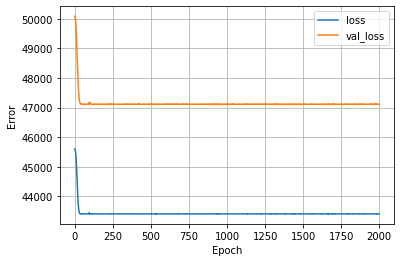

In [9]:
plot_loss(history)

In [121]:
history.history

{'loss': [2232400640.0,
  2150776576.0,
  2007092224.0,
  1953033088.0,
  1980387328.0,
  1968270848.0,
  1951483520.0,
  1953108480.0,
  1954505728.0,
  1946908288.0,
  1939501568.0,
  1938963328.0,
  1941861504.0,
  1938640384.0,
  1936746880.0,
  1925371136.0,
  1927532032.0,
  1924570752.0,
  1940070272.0,
  1934469632.0,
  1935454720.0,
  1913027328.0,
  1930067968.0,
  1954072704.0,
  1935767680.0,
  1944542848.0,
  1922599424.0,
  1923727872.0,
  1931248640.0,
  1911466368.0,
  1920828672.0,
  1910531712.0,
  1918583552.0,
  1933833344.0,
  1915968384.0,
  1928574720.0,
  1927808256.0,
  1911675648.0,
  1915609600.0,
  1901389312.0,
  1898819584.0,
  1927629056.0,
  1917105152.0,
  1917123584.0,
  1904777344.0,
  1926221184.0,
  1900858752.0,
  1892951168.0,
  1918542848.0,
  1938974592.0,
  1934855680.0,
  1901900544.0,
  1905889920.0,
  1896728064.0,
  1895899520.0,
  1891713536.0,
  1897404928.0,
  1895023744.0,
  1901289856.0,
  1903766400.0,
  1887511040.0,
  1918634752.0,
